## 3(2) Feature_Transformation&Selection_1010
221010에 생성한 Feature를 변환, 선택하는 파일이다.

### Import

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [45]:
train = pd.read_csv('../data/feature/20221010_train.csv')
test = pd.read_csv('../data/feature/20221010_test.csv')
train_raw, test_raw = train.copy(), test.copy()

In [46]:
# Feature가 아닌 변수를 제거한다.
del train['id'], test['id']

# X_train, y_train, X_test를 지정한다
y_train = train['target'] ; del train['target']
X_train, X_test = train, test
print('X_train.shape:', X_train.shape, 'X_test.shape', X_test.shape)

X_train.shape: (4701217, 34) X_test.shape (291241, 34)


### $\blacktriangleright$ Feature Transform

In [47]:
cat = ['day_of_week', 'road_rating','multi_linked', 'connect_code', 'maximum_speed_limit',
       'weight_restricted', 'road_type', 'start_turn_restricted', 'end_turn_restricted']
num = [i for i in X_train.columns if i not in cat]

C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  fon

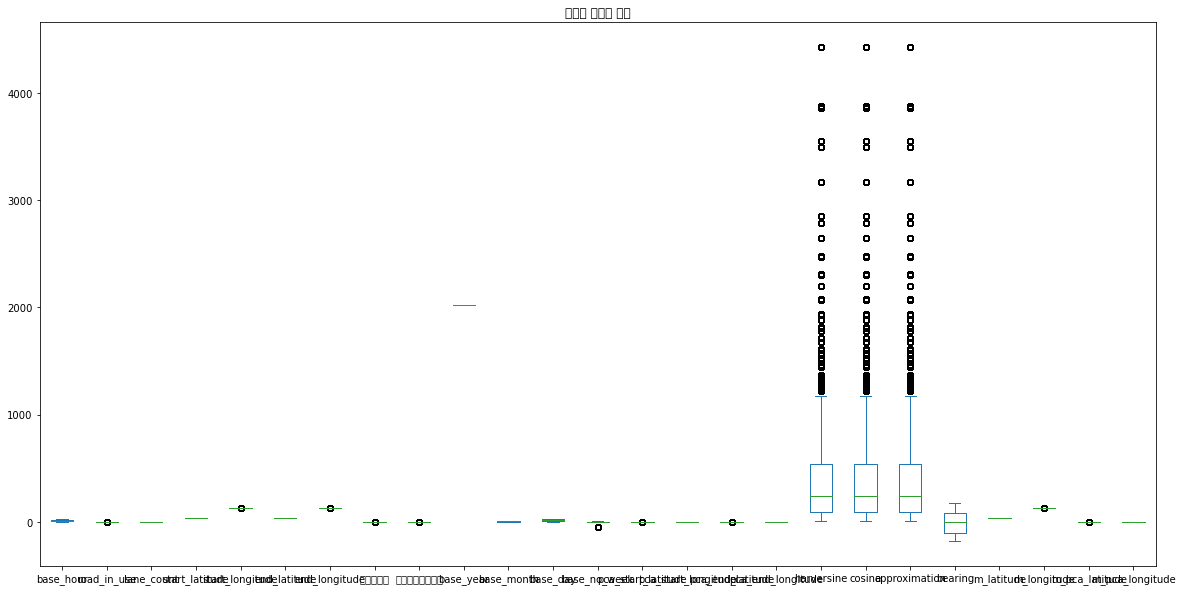

In [52]:
X_train.loc[:,num].plot.box(title="수치형 데이터 분포", figsize=(20,10))
plt.show()

C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  fon

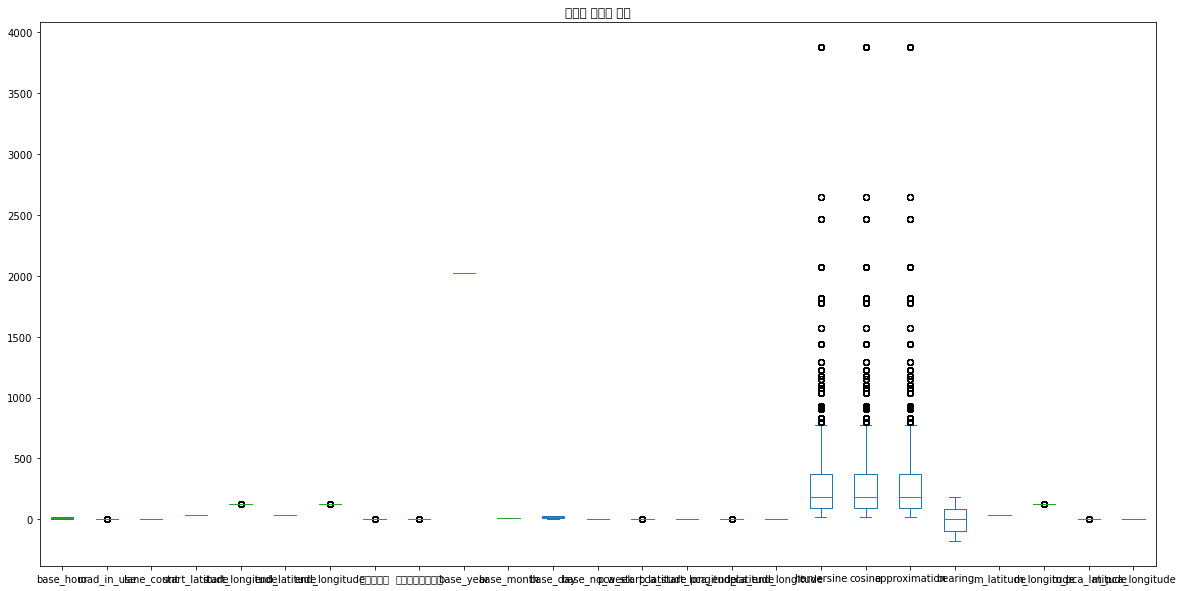

In [56]:
X_test.loc[:,num].plot.box(title="수치형 데이터 분포", figsize=(20,10))
plt.show()

C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50612 missing from current font.
  fon

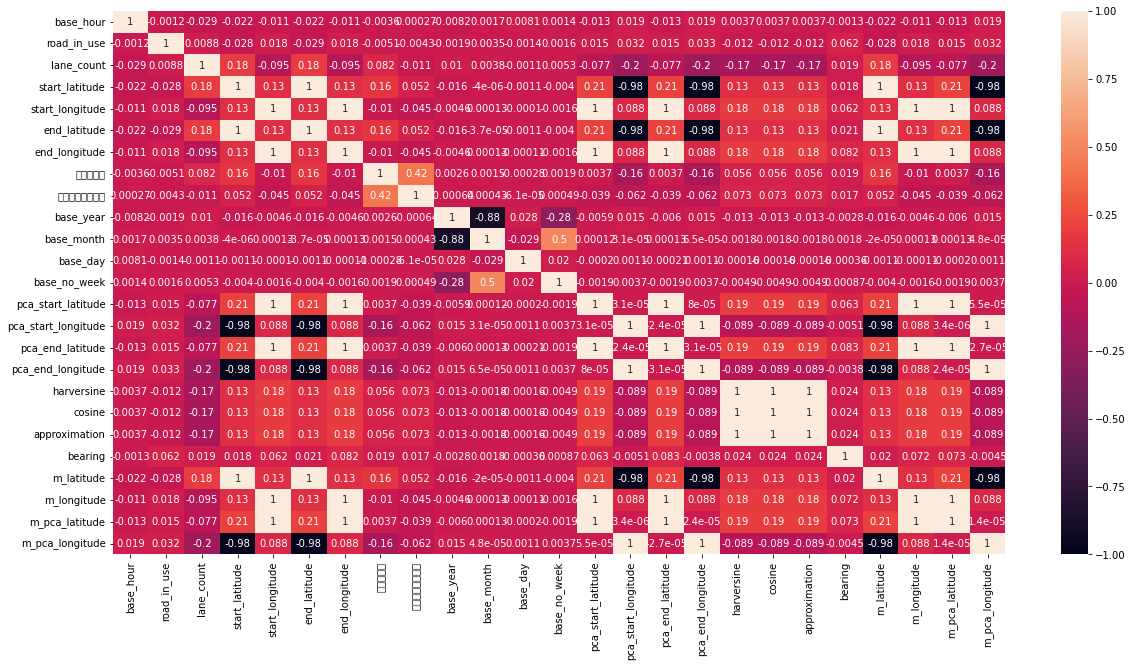

In [54]:
# latitude, longitude를 start, end별로 해야하나?
plt.figure(figsize=(20,10))
sns.heatmap(X_train.loc[:,num].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

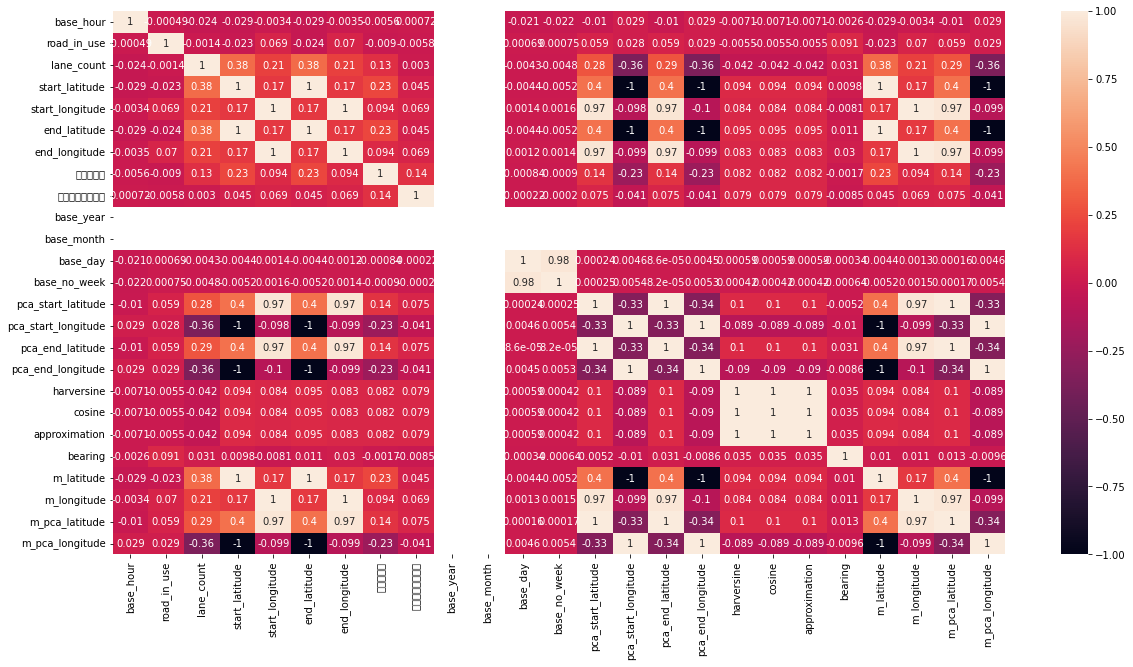

In [55]:
# base_year, base_month는 유용하지 못하다.
plt.figure(figsize=(20,10))
sns.heatmap(X_test.loc[:,num].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

### $\blacktriangleright$ Feature Selection

- Split Data

In [20]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.3, random_state=2022)

- Train Base Model

In [21]:
model = LGBMRegressor(n_estimators=1000, metric= 'mae', random_state = 2022)

In [22]:
model.fit(train_X, train_y)

LGBMRegressor(learning_rate=0.03, metric='mae', n_estimators=1000,
              random_state=2022)

- Adjust Features

In [23]:
# 전체 34개 사용:  3.7691415305167655
# 상위 31개 사용:  3.767568717440456, STOP!
# 상위 29개 사용:  3.7820995654113316
print(f'상위 {X_train.shape[1]}개 사용: ',mean_absolute_error(val_y, model.predict(val_X)))

상위 29개 사용:  3.7820995654113316


In [24]:
# Feature Importance 확인
FI = pd.DataFrame({'Feature_Importances':model.feature_importances_})
display(FI.value_counts().sort_index())

Feature_Importances
71                     1
109                    1
144                    1
147                    1
154                    1
159                    1
253                    1
274                    1
322                    1
539                    1
591                    1
604                    1
645                    1
701                    1
717                    1
761                    1
789                    1
817                    1
978                    1
1091                   1
1448                   1
1481                   1
1548                   1
1788                   1
2222                   1
2315                   1
2439                   1
3173                   1
3720                   1
dtype: int64

In [19]:
# redefine features
# Log loss가 올라가는 importance 이면 그 사이값 재탐색 후 결정한다.
# limit = round(FI.value_counts().sort_index().index[1][0], 6)
# redefine_1 = FI.query('Feature_Importances > @limit').index
# redefine_2 = FI.query('Feature_Importances > @limit').index

# X_train = X_train.iloc[:, redefine_2]
# X_test = X_test.iloc[:, redefine_2]

### Save Data

In [28]:
# 병합할 데이터를 가공한다.
train_id, test_id = train_raw['id'], test_raw['id']
del train_raw['id'], test_raw['id'], train_raw['target']

In [30]:
X_train = pd.concat([train_id, train_raw.iloc[:, redefine_1], y_train], axis=1)
X_test = pd.concat([test_id, test_raw.iloc[:,redefine_1]], axis=1)

In [ ]:
# 삭제한 Column명을 확인한다.
set(train.columns) - set(X_train.columns)

In [36]:
X_train.to_csv('../data/feature/20221010_train_select.csv', index=False)
X_test.to_csv('../data/feature/20221010_test_select.csv', index=False)